## Poisson Regression with boston data

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # for GLM

### Data manipulation

In [3]:
from sklearn import datasets
boston = datasets.load_boston()
X_train = boston['data']
y_train = boston['target'] #number of crime
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X_train[0, ]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [5]:
y = np.round_(y_train, decimals=0, out=None) #make into integers

In [6]:
print(X_train.shape, y.shape) # dimension
# of obs = 506, # of exp v = 13

(506, 13) (506,)


In [7]:
X_train[0:2,]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

* X_train does not contain the column of 1's. In the following, we add the column of 1's into the model matrix.

In [8]:
my_ones = np.ones([506,1]) # 1로만 이루어진 열 추가
print(my_ones.shape, X_train.shape)

(506, 1) (506, 13)


In [9]:
my_ones = np.ones([506,1])
X = np.concatenate((my_ones, X_train), axis=1) # axis=1 : columns
# combine two matrices so that axis=1 is increased
print(X.shape)

(506, 14)


In [10]:
6.3200e-03 # 6.3200* 10**(-3)

0.00632

In [11]:
X[0:3, :]

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00,
        5.3800e-01, 6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00,
        2.9600e+02, 1.5300e+01, 3.9690e+02, 4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,
        4.6900e-01, 6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00,
        2.4200e+02, 1.7800e+01, 3.9690e+02, 9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,
        4.6900e-01, 7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00,
        2.4200e+02, 1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [14]:
y.shape

(506,)

In [18]:
# poisson regression model -> distribution
# X=X1+ X2+ ... +X13 (설명 변수)
poisson_model = sm.GLM(y, X, family=sm.families.Poisson(), link='log') 
# Find W based on MLE
# y~pois(lambda), log(lambda) = b0+b1*x1+ ... + b13*x13
# automatically link function implied link='log' -> 따로 안써도됨
# family : poisson, logistic, gamma regression ...

poisson_results = poisson_model.fit(); # optimizing function 
# -> find beta_0, ... beta_13, maximize likelihood function of this obs

In [19]:
print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  506
Model:                            GLM   Df Residuals:                      492
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.0
Date:                Wed, 16 Dec 2020   Deviance:                       362.69
Time:                        12:58:48   Pearson chi2:                     389.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7780      0.232     16.268      0.0

In [ ]:
# 여기 있는 coef가 각각 b0 ... b13
# 목표는 lambda를 찾는 것 ... mean of y
# lambda hat : beta hat을 사용했으므로
# lambda : always positive -> log 함수 안에 있음이 이를 보여줌
# -> exponential (X(i)*beta hat)

In [17]:
yhat = poisson_results.mu # prediction for each observation
# yhat[0] ... 29.9xx

In [187]:
# yhat = poisson_results.predict(X)

In [ ]:
# Let's calculate yhat[0] using hands
# X[0,]
# yhat0=exp(3.7780+beta1*x1+beta2*x2+... +beta13*x13)
# ==  yhat0=np.exp(np.dot(X[0, ],beta_hat)) ...29.9xx same

In [18]:
np.mean((y_train-yhat)**2)  # Calculation of MSE

16.7256638587818

* Calculate MSE again!

In [19]:
W = poisson_results.params # Estimated parameters
# ... (14,)

In [ ]:
beta_hat = poisson_results.params
beta_hat.shape 
beta_hat = np.reshape(poisson_results.params, [14, 1])

In [20]:
my_yhat = np.exp(np.dot(X, W) )
print(my_yhat.shape) 
# yhat = np.exp(np.dot(X, beta_hat)) # real y.hat
# print(yhat.shape) # (506, 1)

# y_train : (506,)
np.mean((y_train-my_yhat)**2)
# [506,]-[506, 1] -> [1, 506] - [506, 1] -> [506, 506] - [506, 1] ... ugly
# Y = np.reshape(y_train, [506,1])
# Y.shape -> (506, 1) ... 일치
# MSE = np.mean((Y-yhat)**2)

(506,)


16.7256638587818

### Draw plot

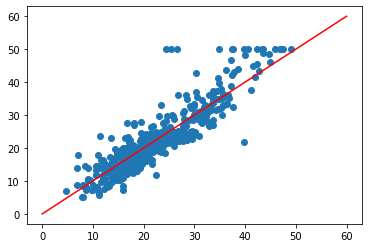

In [21]:
import matplotlib.pyplot as plt
plt.plot(yhat,y_train, 'o')
plt.plot([0, 60], [0,60], 'r-') # prediction looks like good

## Don't look at this part -- 2 weeks later
## Same Solution - Optimization based on Gradient Descent

* This part will be revisited later

In [20]:
XX=(X-X.mean(axis=0))/np.std(X, axis=0)
# GD algorithm을 쓰려면 X standardized를 해줘야 함

C:\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
# XX = X -> standardization is very important for gradient descent working
# 안하면 overflow ...

In [21]:
XX[:,0]=1 # 1st column = 1

In [22]:
Y=y.reshape([506,1])
Y.shape

(506, 1)

In [13]:
import scipy

In [23]:
def f(beta, X, Y): # 정의 # this is -1 (beta)
    # -f(beta) : negative value of log likelihood function : maximizing
    # = minimize (- log function)
    temp = np.exp(np.dot(X,beta))-Y*np.dot(X, beta)+scipy.special.gammaln(Y+1)
    return np.sum(temp)

# df obtained for free once you define f
# df(f) 

def df(beta, X, Y): # don't need to calculate ... automatical
    # in actual data analysis, using tensorflow, df is freely obtained from f function, derivative(f)
    temp = np.exp(np.dot(X,beta))-Y
    temp2 = np.mean(X*temp, axis=0)
    return temp2.reshape([14,1])

In [24]:
# gradient descent ... to find minimize things
beta0=np.random.normal(0,1,[14,1]) # 14 column ... dim of beta0 = [14,1]
lr=0.001
iter1=5000 # iteration : 5000 -> # of data in each iteration : 506
# of total data -> 5000 * 506
beta=beta0
history=np.ones([iter1,])
for i in range(0,iter1):
    beta = beta - lr * df(beta, XX, Y) # y is moving
    history[i]=f(beta, XX, Y)
    #print("************************",  i, "**********************",    beta)

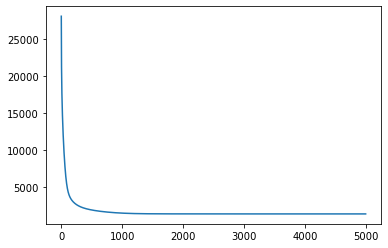

In [25]:
import matplotlib.pyplot as plt
plt.plot(history[:]) # learning is over
# negative function의 값이 점점 작아진다는 것은 곧 maximize를 의미함
# learning curve - flat : learning is over when 1000
# x축 : iteration number
# negative라서 값이 작을 수록 좋음

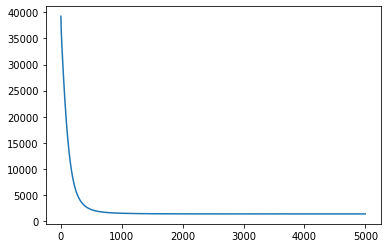

In [205]:
import matplotlib.pyplot as plt
plt.plot(history[:])

In [26]:
beta # 위에서 사용한 x와 약간 다름 : standardized 여부

array([[ 3.04864465],
       [-0.08872099],
       [ 0.02445404],
       [ 0.01577132],
       [ 0.02333752],
       [-0.08034107],
       [ 0.08589046],
       [ 0.01040775],
       [-0.10300676],
       [ 0.13523935],
       [-0.09143892],
       [-0.07765697],
       [ 0.04368575],
       [-0.22417392]])

In [211]:
f(beta, XX, Y)

1416.0202939098758

In [212]:
my_yhat = np.exp(np.dot(X, W) )
my_yhat2 = np.exp(np.dot(XX, beta) )

In [213]:
my_yhat[1:10]

array([24.69482883, 31.57108125, 29.83295113, 28.29189   , 26.02959171,
       22.14341111, 18.13403117, 11.96775387, 18.19758204])

In [214]:
my_yhat2[1:10]

array([[24.69994292],
       [31.5711263 ],
       [29.83283516],
       [28.29114655],
       [26.03383602],
       [22.15077532],
       [18.14084703],
       [11.97271604],
       [18.20521123]])